In [1]:
import torch 
from torch import nn 

import torchvision
from torchvision import datasets
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="../../datasets/mnist_data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=torchvision.transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="../../datasets/mnist_data",
    train=False, # get test data
    download=True,
    transform=torchvision.transforms.ToTensor()
)

In [3]:
image , labels = train_data[0]
image , labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape # its a 1 color channel (grayscale or black & white ) and 28 x 28 size of image 
            # so i.e [ color_channel , height , width ] 

torch.Size([1, 28, 28])

In [5]:
class_names = train_data.classes
class_names # all the classes labels 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

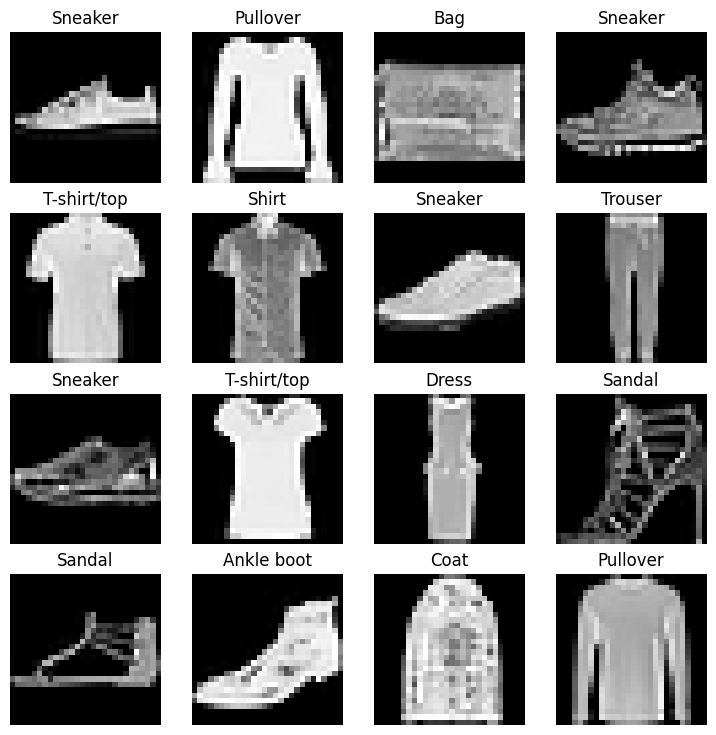

In [6]:
# Plot images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_index = torch.randint(1, len(train_data) + 1 ,size=[1]).item()
    # It generates random int whose value is between 1 and len(input_data) and size=[1] mean it will generate only one number 
    image , label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);


# <span style="color:#2E86C1;"><b>DataLoader: Efficiently Loading Data for Training</b></span>


The `DataLoader` is a key component in PyTorch for efficiently loading data into a model, both during training and inference. It takes a large dataset and turns it into an iterable of smaller chunks, called **batches**.

### <span style="color:#D35400;"><b>Process</b></span>

- **DataLoader** helps by loading data in manageable mini-batches rather than all at once.
- **Batches** can be customized with the `batch_size` parameter, making it possible to load smaller portions of data in each pass through the model.

### <span style="color:#28B463;"><b>Why Use Batches?</b></span>

Using batches instead of feeding all data at once has key advantages:

- **Computational Efficiency**: Large datasets can overwhelm computing resources. Splitting them into batches ensures more efficient use of memory and processing power.
- **Frequent Updates**: Batches allow more frequent weight updates within each epoch, improving the model’s ability to converge.

### <span style="color:#F39C12;"><b>Good Practices for Batch Sizes</b></span>

- **Start with 32**: A batch size of 32 is a common starting point.
- **Try Powers of 2**: Typical batch sizes are powers of 2, such as 32, 64, 128, and so on.
- **Experimentation**: Since `batch_size` is a hyperparameter, try different values to find the best fit for your specific problem.

### <span style="color:#9B59B6;"><b>Benefits of Mini-batch Gradient Descent</b></span>

- **Efficiency**: Processing smaller, fixed-size batches reduces the overall computational load.
- **Enhanced Learning**: The model’s weights are updated more frequently per epoch, allowing faster convergence and potentially better performance.



In [7]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)


test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000016EEFBAA390>, <torch.utils.data.dataloader.DataLoader object at 0x0000016EEFF5ACD0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [8]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

- Each batch will contain **32 images of size 1x28x28**.
- **`iter(...)`** creates an iterator to go through the batches, where each batch contains 32 images.
- **`next(...)`** retrieves the next batch of 32 images from the iterator.

# <span style="color:#2E86C1"><b>Flatten Layer</b></span>


In this section, we’ll create a **baseline model** using the `nn.Flatten()` layer in PyTorch. 

A baseline model serves as the simplest version of a model that we can build upon to improve with more complexity later. Here, our model will consist of two `nn.Linear()` layers, with `nn.Flatten()` used to prepare our data for the linear layers.

#### <span style="color:#D35400"><b>What is `nn.Flatten()`?</b></span>

- The **`nn.Flatten()`** layer compresses the dimensions of a tensor into a single vector.
- This is particularly useful when working with **image data** where each image has multiple dimensions: **color channels, height, and width**.
- **Why Flatten?** `nn.Linear()` layers require inputs in the form of a **feature vector**, so `nn.Flatten()` transforms our input data appropriately.


In [9]:
# Create a flatten layer
flatten_model = nn.Flatten()  # Flatten the input tensor for linear layers

# Get a single sample from the training batch
x = train_features_batch[0]

# Apply flattening (forward pass)
output = flatten_model(x)

# Print shape transformations
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


#### <span style="color:#F39C12"><b>Explanation of Shapes:</b></span>

- **Before Flattening**: The shape of `x` is `[1, 28, 28]` which corresponds to `[color_channels, height, width]`.
- **After Flattening**: The shape of `output` becomes `[1, 784]`, where `784` is the result of multiplying `28 * 28` to create a single feature vector.

#### <span style="color:#9B59B6"><b>Why Use Flattening?</b></span>

Using `nn.Flatten()` allows us to:
- Convert image data from **height and width dimensions into a single feature vector**.
- Make our data compatible with **`nn.Linear()` layers**, which expect input data to be in feature vector format.

# <span style="color:#2E86C1"><b>Model-0</b></span>

In [10]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [11]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # at one time single image will go in model means a [ 1 x 28 x 28 ] image means 784 values/inputs(x)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class 
)

In [12]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [13]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# <span style="color:#2E86C1"><b>Training and Evaluating the Model with Batches</b></span>

In this section, we'll detail the steps to train and evaluate our model using data in batch form. Since we are now working with batches, we will implement an additional loop to process these batches.

### <span style="color:#D35400"><b>Data Batches</b></span>

- **Batches**: Each batch consists of `BATCH_SIZE` samples of features $X$ (images) and labels $y$. 
- **BATCH_SIZE**: We will set this to **32**, meaning each batch contains **32 samples** of images and their corresponding targets.

### <span style="color:#28B463"><b>Calculating Loss and Metrics</b></span>

- Since we're working with batches, the loss and evaluation metrics will be computed **per batch** rather than across the entire dataset. 
- This requires dividing our loss and accuracy values 
by the number of batches in each dataset's respective DataLoader.

### <span style="color:#F39C12"><b>Steps to Follow</b></span>

1. **Loop Through Epochs**: 
   - Iterate through a predefined number of epochs to train the model.

2. **Loop Through Training Batches**:
   - For each training batch, perform the following:
     - Forward pass: Pass the batch of features through the model.
     - Calculate the loss: Use the model’s output to compute the loss against the true labels.
     - Backward pass: Compute the gradients and update the model weights.

3. **Loop Through Testing Batches**:
   - For each testing batch, perform the following:
     - Forward pass: Pass the batch of features through the model.
     - Calculate the loss: Use the model’s output to compute the loss against the true labels.
     - Compute evaluation metrics: Calculate accuracy or other metrics to assess model performance.

4. **Print Progress**: 
   - After each epoch, print out the current training loss, testing loss, and any evaluation metrics to monitor progress.


In [14]:
#This code cell is for understanding purpose 
for batch, (X, y) in enumerate(train_dataloader):  # This is How we wil traverse each batch
    print(batch,X.shape,y.shape) # It will show '0' -> which is a batch no 
    break                        # In X -> All [1,28,28] Inputs in Batch of 32 
                                 # In Y -> All 32 labels for all 32 images in single batch   

0 torch.Size([32, 1, 28, 28]) torch.Size([32])


In [15]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)

EPOCHS = 3

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0

    for batch , (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)

        train_loss += loss 

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


    train_loss /= len(train_dataloader)

    ### Testing 

    test_loss , test_acc  = 0 , 0 

    model_0.eval()

    with torch.inference_mode():

        for X , y in test_dataloader:

            test_pred = model_0(X)

            test_loss += loss_fn(test_pred,y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    
     ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.51016, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47435 | Test loss: 0.52677, Test acc: 81.68%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45367 | Test loss: 0.51264, Test acc: 83.00%



# <span style="color:#2E86C1"><b>Model-1 </b></span>

we will be `introducing non linearity` in this model by `using RELU activation function` between layers 

In [16]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layer_stack(x)

In [17]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                                lr=0.1)

In [19]:
def train_step(model,
               data_loader,
               loss_fn,
               optimizer,
               accuracy_fn):

    train_loss , train_acc = 0 , 0 

    model.train()

    for batch , (x,y) in enumerate(data_loader):
        
        y_pred = model(x)
        
        loss = loss_fn(y_pred,y)

        train_loss += loss 

        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    
    train_loss /= len(data_loader)

    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [20]:
def test_step(model,data_loader,loss_fn,accuracy_fn):

    test_loss , test_acc = 0 , 0 

    model.eval()

    with torch.inference_mode():
        
        for x , y in data_loader:

            y_pred = model(x)

            test_loss += loss_fn(y_pred,y)

            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)

        test_acc /= len(data_loader)

        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [21]:
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.66161 | Train accuracy: 76.82%
Test loss: 0.53087 | Test accuracy: 80.48%

Epoch: 1
---------
Train loss: 0.48418 | Train accuracy: 82.61%
Test loss: 0.53581 | Test accuracy: 81.01%

Epoch: 2
---------
Train loss: 0.45398 | Train accuracy: 83.73%
Test loss: 0.48129 | Test accuracy: 83.14%



In [22]:
def eval_models(model,data_loader,loss_fn,accuracy_fn):

    loss , acc = 0 , 0 

    model.eval()

    with torch.inference_mode():
        
        for x , y in data_loader:

            y_pred = model(x)

            loss += loss_fn(y_pred,y)

            acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)

        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [23]:
model_0_results = eval_models(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)

model_1_results = eval_models(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)

In [31]:
print(model_0_results)
print(model_1_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.5124601125717163, 'model_acc': 83.00718849840256}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.4804098606109619, 'model_acc': 83.15694888178913}


# <span style="color:#2E86C1"><b>Model-2: Introducing Convolutional Neural Networks (CNNs)</b></span>

In this model, we introduce a **Convolutional Neural Network (CNN)**, a specialized neural network designed specifically for **image processing tasks**. CNNs are highly effective for extracting **useful features** from images, making them ideal for classification tasks.

### <span style="color:#D35400"><b>Components of a Convolutional Neural Network</b></span>

A CNN model generally consists of the following layers:

1. **Input Layer**: 
   - This layer takes in the image data. 
   - Images typically have **3 channels** for color (RGB) or **1 channel** for grayscale.

2. **Convolutional Layer**:
   - The **core layer of CNNs**. Convolutional layers contain learned **kernels** (or weights) that extract features such as edges, textures, and patterns from images. 
   - Each convolutional neuron performs an **elementwise dot product** with its corresponding kernel and the preceding layer's output. This operation results in **feature maps**—representations of image features that help distinguish different parts of the image.

#### <span style="color:#28B463"><b>Example of Convolution Operation</b></span>

<center><img src="../../images/CNN_opration.gif" alt="error" width="500"/></center>

In the image above, let’s consider a convolutional layer within a **Tiny VGG architecture**. 

- In the **first convolutional layer**, there are **10 neurons**, while the previous layer has **3 neurons** (one for each channel—Red, Green, Blue).
- Each neuron in the convolutional layer is connected to every neuron in the previous layer, making it a **fully-connected layer**.
- Each neuron has **3 unique kernels**, one for each channel, to process the input. The **output feature map** from each neuron is generated by summing up the results of each kernel’s interaction with the input layer.


# <span style="color:#2E86C1"><b>Key Convolution Parameters: Stride, Padding, and Kernel Size</b></span>

Understanding **stride**, **padding**, and **kernel size** is essential to controlling how convolutional layers process input data. These parameters impact the **spatial dimensions** of the output feature map and the ability of the network to capture features effectively.

---

### <span style="color:#D35400"><b>1. Kernel Size</b></span>

- **Definition**: The kernel size is the dimensions of the filter that slides across the input. Common sizes are **3x3** or **5x5**.
- **Function**: Each kernel extracts features within a limited spatial region. Smaller kernels capture fine details, while larger ones capture broader features.
- **Impact**: A larger kernel covers more area, but reduces output dimensions because there are fewer locations it can fit within the original image.

---

### <span style="color:#28B463"><b>2. Stride</b></span>

- **Definition**: Stride is the number of pixels by which the kernel moves (or "strides") across the input.
- **Function**: A **stride of 1** moves the kernel one pixel at a time, creating overlapping regions. A larger stride (e.g., **2**) skips pixels, reducing overlap.
- **Impact**: Increasing stride reduces the output size, effectively **downsampling** the input and making the model more efficient. However, it may miss fine details due to the larger steps.

---

### <span style="color:#F39C12"><b>3. Padding</b></span>

- **Definition**: Padding is the addition of extra pixels (usually zeros) around the border of the input.
- **Function**: Padding helps control the output size by allowing kernels to fit over border regions.
- **Impact**: Without padding, the output size decreases due to border exclusion. **Padding ("same" padding)** preserves the input size, ensuring all regions of the input are considered.

---

<center><img src="../../images/conv_component.gif" alt="error" width="600"/></center>

# <span style="color:#2E86C1"><b>Understanding TinyVGG Architecture and Convolutional Process</b></span>

**TinyVGG** is a **simplified version of the VGG (Visual Geometry Group) network**. VGG architectures are known for their simplicity and effectiveness in image processing tasks, using small convolutional filters, typically **3x3 kernels**, to capture spatial features across multiple layers. TinyVGG is designed to be a lightweight, efficient version for educational purposes, ideal for understanding convolutional operations in neural networks.

### <span style="color:#D35400"><b>Convolutional Process: Kernel and Activation Map Creation</b></span>

In a convolutional layer, a **3x3 kernel** (or filter) is applied to an image in a sliding window fashion to produce a transformed output known as an **activation map**. Here’s how it works in detail:

<center><img src="../../images/convlayer_detailedview_demo.gif" alt="error" width="600"/></center>

1. **Dot Product for Single Kernel Application**:
   - The kernel matrix (e.g., a 3x3 matrix) is element-wise multiplied with a corresponding patch of the input image.
   - The sum of these multiplications yields a **single value** for that patch of the image.

2. **Sliding the Kernel Across the Image**:
   - After computing the dot product for one patch, the kernel shifts by a certain number of pixels, known as the **stride**, to the next patch.
   - For a **stride of 1**, the kernel moves 1 pixel at a time, creating **overlapping regions**.
   - For a larger stride, it moves more pixels at each step, covering the image faster but potentially losing some detail.

3. **Output Matrix (Activation Map)**:
   - The result of applying the kernel across all positions in the image forms a **new matrix**—the activation map.
   - The size of this activation map depends on the **input size**, **kernel size**, **stride**, and **padding**. Padding involves adding extra pixels (usually zeros) around the image border to maintain output dimensions.

### <span style="color:#28B463"><b>Formula for Calculating Output Dimensions</b></span>

For an input image of size $ H_{in} \times W_{in} $ which is **Height** and **Width** sizes respectively and a kernel of size $ K \times K $, with padding $ P $ and stride $ S $, the output dimensions $ H_{out} $ and $ W_{out} $ can be calculated as:

$$
H_{out} = \frac{H_{in} - K + 2P}{S} + 1
$$
$$
W_{out} = \frac{W_{in} - K + 2P}{S} + 1
$$

### <span style="color:#F39C12"><b>Handling Color Channels (RGB)</b></span>

When working with color images, which have **3 channels (R, G, B)**, the convolutional process is applied to each channel independently:

1. **Applying Kernels to Each Channel**:
   - Each kernel operates separately on the **R**, **G**, and **B** channels, producing separate activation maps for each channel.
   - So, a single 3x3 kernel applied to a color image results in **three separate activation values**—one for each channel.

2. **Aggregating the Channel Outputs**:
   - These three activation maps (one per channel) are **summed** together along with a **bias** term to produce a **single combined output**.
   - This combined output is passed to the next layer as a **single activation map** for the neuron in the convolutional layer.

In essence, the convolutional layer creates feature maps for each color channel and aggregates them, allowing the network to learn spatial features across color channels and extract patterns essential for image recognition.